In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np
import missingno as msno

#Loading data
df = pd.read_csv('PricingData.csv')
X = df

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 10)
np.set_printoptions(threshold = np.inf)

In [ ]:
bus = X['Bus'].unique()

In [ ]:
#drop rows having both Seat Fare Type 1 and 2 as NaN
X.dropna(subset=['Seat Fare Type 1', 'Seat Fare Type 2'], how='all', inplace=True)
X.describe(include='all')

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt
count,17785,12746,30531,30531,30531
unique,1119,233,117,16,12159
top,"800.00,750.00",0,5580f995d6f4d3bcceca7e2db6c77bf7,15-07-2020 00:00,20-07-2020 23:38
freq,589,4376,2418,2744,114


In [ ]:
#Splitting lists in Seat fare type 1 to separate rows (called 'exploding')
SFT1 = X['Seat Fare Type 1'].str.split(',')
X['Seat Fare Type 1'] = SFT1
X=X.explode('Seat Fare Type 1', ignore_index=True)

#Splitting lists in Seat fare type 2 to separate rows (called 'exploding')
SFT2 = X['Seat Fare Type 2'].str.split(',')
X['Seat Fare Type 2'] = SFT2
X=X.explode('Seat Fare Type 2', ignore_index=True)

In [ ]:
#Convert object data to float data
X[['Seat Fare Type 1', 'Seat Fare Type 2']] = X[['Seat Fare Type 1', 'Seat Fare Type 2']].apply(pd.to_numeric, errors='coerce')
print(X.describe(include='all'))

        Seat Fare Type 1  Seat Fare Type 2                               Bus  \
count       37388.000000      14628.000000                             52016   
unique               NaN               NaN                               117   
top                  NaN               NaN  5580f995d6f4d3bcceca7e2db6c77bf7   
freq                 NaN               NaN                              4682   
mean          745.325131        426.207274                               NaN   
std           153.988485        303.177063                               NaN   
min            69.000000          0.000000                               NaN   
25%           650.000000          0.000000                               NaN   
50%           749.000000        530.000000                               NaN   
75%           824.000000        650.000000                               NaN   
max          1499.000000       1205.000000                               NaN   

            Service Date        Recorde

In [ ]:
#Merging sft1 and sft2 and adding a new column which indicates the type of fare
X['Fare Type'] = np.where(np.isnan(X['Seat Fare Type 1'].values), 2, 1)
X['Seat Fare Type 1'] = X['Seat Fare Type 1'].fillna(X['Seat Fare Type 2'])
X.rename(columns={'Seat Fare Type 1':'Seat Fare'}, inplace = True)
X.drop('Seat Fare Type 2', axis=1, inplace=True)

#convert string to date time format
X['RecordedAt'] = pd.to_datetime(X['RecordedAt'], format='%d-%m-%Y %H:%M')
X['Service Date'] = pd.to_datetime(X['Service Date'], format='%d-%m-%Y %H:%M')

# print(X.dtypes)
# print(X)

In [ ]:
#Remove zero rows
X = X.loc[(X['Seat Fare']!=0)]

In [ ]:
#Convert dates to integer taking 01-01-1970 00:00:00 as reference
X['RecordedAt'] = X['RecordedAt'].apply(lambda x: x.value)
print(X)
X.describe()

       Seat Fare                               Bus Service Date  \
0          900.0  d6fa79179fda2a77455794637f225962   2020-07-15   
1          800.0  d6fa79179fda2a77455794637f225962   2020-07-15   
2          910.0  d6fa79179fda2a77455794637f225962   2020-07-15   
3          833.0  d6fa79179fda2a77455794637f225962   2020-07-15   
4          795.0  d6fa79179fda2a77455794637f225962   2020-07-15   
...          ...                               ...          ...   
52011      810.0  6ebe14c775a983e43b07c55e6b71d77d   2020-07-30   
52012      925.0  6ebe14c775a983e43b07c55e6b71d77d   2020-07-30   
52013      810.0  6ebe14c775a983e43b07c55e6b71d77d   2020-07-30   
52014      925.0  6ebe14c775a983e43b07c55e6b71d77d   2020-07-30   
52015      810.0  6ebe14c775a983e43b07c55e6b71d77d   2020-07-30   

                RecordedAt  Fare Type  
0      1594484880000000000          1  
1      1594484880000000000          1  
2      1594495020000000000          1  
3      1594495020000000000         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Seat Fare,RecordedAt,Fare Type
count,47640.000000,4.764000e+04,47640.000000
mean,715.801343,1.595374e+18,1.215197
std,161.869362,5.423307e+14,0.410963
min,69.000000,1.589712e+18,1.000000
25%,600.000000,1.595055e+18,1.000000
50%,710.000000,1.595427e+18,1.000000
75%,800.000000,1.595762e+18,1.000000
max,1499.000000,1.596098e+18,2.000000


In [ ]:
#Mix Max scaling for RecordedAt column
from sklearn.preprocessing import MinMaxScaler
mm_X = MinMaxScaler()
X['RecordedAt'] = mm_X.fit_transform(X['RecordedAt'].to_numpy().reshape(-1,1))

X['RecordedAt'] *= 500

X.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Seat Fare,Bus,Service Date,RecordedAt,Fare Type
count,47640.000000,47640,47640,47640.000000,47640.000000
unique,NaN,78,16,NaN,NaN
top,NaN,5580f995d6f4d3bcceca7e2db6c77bf7,2020-07-30 00:00:00,NaN,NaN
freq,NaN,4682,4677,NaN,NaN
first,NaN,NaN,2020-07-15 00:00:00,NaN,NaN
last,NaN,NaN,2020-07-30 00:00:00,NaN,NaN
mean,715.801343,NaN,NaN,443.347055,1.215197
std,161.869362,NaN,NaN,42.467393,0.410963
min,69.000000,NaN,NaN,0.000000,1.000000
25%,600.000000,NaN,NaN,418.337311,1.000000


In [ ]:
mapping = {}
c = 0

for id in bus:
    mapping[id] = c
    c += 1

X.replace({'Bus': mapping}, inplace=True)
X

,Seat Fare,Bus,Service Date,RecordedAt,Fare Type
0,900.0,0,2020-07-15,373.709136,1
1,800.0,0,2020-07-15,373.709136,1
2,910.0,0,2020-07-15,374.503153,1
3,833.0,0,2020-07-15,374.503153,1
4,795.0,0,2020-07-15,374.503153,1
...,...,...,...,...,...
52011,810.0,64,2020-07-30,499.906034,1
52012,925.0,64,2020-07-30,499.967112,1
52013,810.0,64,2020-07-30,499.967112,1
52014,925.0,64,2020-07-30,499.967112,1


In [ ]:
#group the dataframe by Service Date
gp = X.groupby('Service Date')
X_15 = gp.get_group('2020-07-15')

In [ ]:
# X_15_temp = X_15['Seat Fare'].to_numpy()
X_15 = X_15[['Seat Fare', 'RecordedAt']]
print(X_15.shape)

(3964, 2)


In [ ]:
print(X['Service Date'].dt.year)

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
52011    2020
52012    2020
52013    2020
52014    2020
52015    2020
Name: Service Date, Length: 47640, dtype: int64


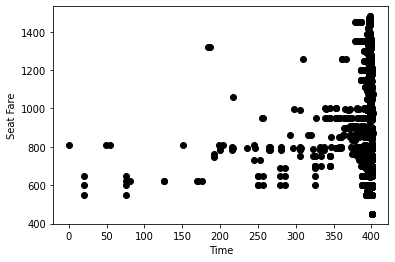

In [ ]:
plt.scatter(X_15["RecordedAt"],X_15["Seat Fare"],c='black')
plt.xlabel('Time')
plt.ylabel('Seat Fare')
plt.show()

In [ ]:
# for key in gp.groups.keys():
#     temp = gp.get_group(key)

#     plt.scatter(temp["RecordedAt"], temp["Seat Fare"], c='black', s=3)
#     plt.title(key)
#     plt.xlabel('Time')
#     plt.ylabel('Seat Fare')
#     plt.show()

In [ ]:
# gp_c = X.groupby('Bus')
# for key in gp_c.groups.keys():
#     temp = gp_c.get_group(key)

#     plt.scatter(temp["RecordedAt"], temp["Seat Fare"], c='black', s=3)
#     plt.title(key)
#     plt.xlabel('Time')
#     plt.ylabel('Seat Fare')
#     plt.show()

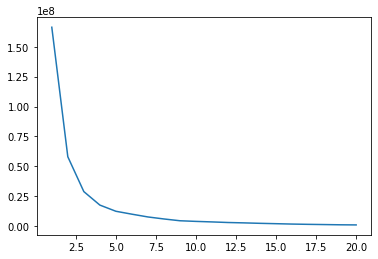

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,21):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_15)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,21),wcss)
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X_15)
centroids = kmeans.cluster_centers_

X_15['clusters'] = kmeans.labels_
# print(X_15['clusters'])
X_15_temp = gp.get_group('2020-07-15')
X_15['Bus'] = X_15_temp['Bus']

X_15

,Seat Fare,RecordedAt,clusters,Bus
0,900.0,373.709136,1,0
1,800.0,373.709136,0,0
2,910.0,374.503153,1,0
3,833.0,374.503153,0,0
4,795.0,374.503153,0,0
...,...,...,...,...
4316,1200.0,401.006380,2,64
4317,810.0,401.100347,0,64
4318,1200.0,401.100347,2,64
4319,810.0,401.217805,0,64


In [ ]:
gps = X_15.groupby('clusters')
# X_15_c1 = gps.get_group(1)

# take mean of seat fare for a bus belonging to one cluster
# store earliest RecordedAt value and discard others

# X_15_c1.sort_values(['Bus', 'RecordedAt'], ascending = [True, True], inplace = True)

# X_15_c1 = X_15_c1.drop_duplicates(subset=['Bus'], keep='first')

In [ ]:
# X_15_c1.dtypes

In [ ]:
# confidence_score = np.zeros((78,78))

# # when comparing <A,B> if A has lesser RecordedAt value, then give +ve sign to confidence_score[A][B]
# # when comparing <A,B> if A has more RecordedAt value, then give -ve sign to confidence score for confidence_score[A][B]

# for index, row in X_15_c1.iterrows():
#     A = row
#     for index, row in X_15_c1.iterrows():
#         B = row
#         A_code = int(A['Bus'])
#         B_code = int(B['Bus'])
#         confidence_score[A_code][B_code] = 1 - abs(A['Seat Fare'] - B['Seat Fare'])/abs(A['Seat Fare'] + B['Seat Fare'])
#         if(A['RecordedAt'] > B['RecordedAt']):
#             confidence_score[A_code][B_code] = -confidence_score[A_code][B_code] 

# print(confidence_score)

In [ ]:
confidence_score = np.zeros((117,117))
frequency = np.zeros((117,117))

In [ ]:
#group the dataframe by Service Date
gp = X.groupby('Service Date')
# X_15 = gp.get_group('2020-07-15')

# # X_15_temp = X_15['Seat Fare'].to_numpy()
# X_15 = X_15[['Seat Fare', 'RecordedAt']]
# print(X_15.shape)

In [ ]:
# from sklearn.cluster import KMeans

# for i in range(16):
#     wcss=[]

#     X_day = gp.get_group(dates[i])
#     for i in range(1,21):
#         kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
#         kmeans.fit(X_day[['Seat Fare', 'RecordedAt']])
#         wcss.append(kmeans.inertia_)

#     plt.plot(range(1,21),wcss)
#     plt.show()

In [ ]:
dates = {0 : '2020-07-15', 1 : '2020-07-16', 2 : '2020-07-17', 3: '2020-07-18', 4: '2020-07-19', 5: '2020-07-20', 6: '2020-07-21', 7: '2020-07-22', 8: '2020-07-23', 9: '2020-07-24', 10: '2020-07-25', 11: '2020-07-26', 12: '2020-07-27', 13: '2020-07-28', 14: '2020-07-29', 15: '2020-07-30'}

In [ ]:
# kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
# y_kmeans = kmeans.fit_predict(X_15)
# centroids = kmeans.cluster_centers_

# X_15['clusters'] = kmeans.labels_
# # print(X_15['clusters'])
# X_15_temp = gp.get_group('2020-07-15')
# X_15['Bus'] = X_15_temp['Bus']

# X_15

In [ ]:
# when comparing <A,B> if A has lesser RecordedAt value, then give +ve sign to confidence_score[A][B]
# when comparing <A,B> if A has more RecordedAt value, then give -ve sign to confidence score for confidence_score[A][B]

from sklearn.cluster import KMeans

for i in range(16):
    X_day = gp.get_group(dates[i])
    kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)

    y_kmeans = kmeans.fit_predict(X_day[['Seat Fare', 'RecordedAt']])
    # centroids = kmeans.cluster_centers_

    X_day['clusters'] = kmeans.labels_
    gps = X_day.groupby('clusters')

    for i in range(4):
        X_day_cluster = gps.get_group(i)
        X_day_cluster.sort_values(['Bus', 'RecordedAt'], ascending = [True, True], inplace = True)

        X_day_cluster = X_day_cluster.drop_duplicates(subset=['Bus'], keep='first')

        for i, row_i in X_day_cluster.iterrows():
            A = row_i
            for j, row_j in X_day_cluster.iterrows():
                B = row_j

                if not(i == j):
                    A_code = int(A['Bus'])
                    B_code = int(B['Bus'])

                    if(A['RecordedAt'] > B['RecordedAt']):
                        confidence_score[A_code, B_code] += -1+(abs(A['Seat Fare'] - B['Seat Fare']))/(A['Seat Fare'] + B['Seat Fare'])
                        frequency[A_code, B_code] += 1
                    else:
                        confidence_score[A_code, B_code] += 1-(abs(A['Seat Fare'] - B['Seat Fare']))/(A['Seat Fare'] + B['Seat Fare'])
                        frequency[A_code, B_code] += 1

print(pd.DataFrame(confidence_score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

          0    1    2    3    4    ...       112       113       114  \
0    0.000000  0.0  0.0  0.0  0.0  ... -3.862154  1.998819  0.957634   
1    0.000000  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000   
2    0.000000  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000   
3    0.000000  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000   
4    0.000000  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000   
..        ...  ...  ...  ...  ...  ...       ...       ...       ...   
112  5.862154  0.0  0.0  0.0  0.0  ...  0.000000  1.946816  0.937402   
113 -1.998819  0.0  0.0  0.0  0.0  ... -1.946816  0.000000  0.000000   
114 -0.957634  0.0  0.0  0.0  0.0  ... -0.937402  0.000000  0.000000   
115  0.958466  0.0  0.0  0.0  0.0  ...  0.938233  0.000000  1.913452   
116 -0.025415  0.0  0.0  0.0  0.0  ... -0.032421  0.954188  0.071804   

          115       116  
0   -0.958466  0.025415  
1    0.000000  0.000000  
2    0.000000  0.000000  
3    0.000000  0.000000  
4    

In [ ]:
# confidence_score = confidence_score / np.amax(confidence_score)
#confidence_score = confidence_score / 60

# print(pd.DataFrame(confidence_score))
# print(np.amax(confidence_score))

# assign 1 - each cell value to each cell and assign sign as well

for i in range(117):
    for j in range(117):
        if(frequency[i, j] > 5):
            confidence_score[i, j] = confidence_score[i, j] / frequency[i, j]
        else:
            confidence_score[i, j] = confidence_score[i, j] / 5

# print(pd.DataFrame(confidence_score))

In [ ]:
follows_cf = []
followedby_cf = []

follows = []
followedby = []

def get_key(val):
    for key, value in mapping.items():
         if val == value:
             return key

for i in range(117):
    maxInColumns = np.amax(confidence_score[i,:], axis=0)
    minInColumns = np.amin(confidence_score[i,:], axis=0)

    follows_cf.append(abs(minInColumns))
    followedby_cf.append(maxInColumns)

    max_index = confidence_score[i,:].argmax(axis=0)
    min_index = confidence_score[i,:].argmin(axis=0)

    if(minInColumns == 0):
        follows.append("")
    else:
        follows.append(get_key(min_index))
    
    if(maxInColumns == 0):
        followedby.append("")
    else:
        followedby.append(get_key(max_index))

submission = pd.DataFrame(
    {'Bus': bus,
     'Follows': follows,
     'Confidence Score (Follows)': follows_cf,
     'Is followed by': followedby,
     'Confidence Score (Is followed by)': followedby_cf}
)

submission

,Bus,Follows,Confidence Score (Follows),Is followed by,Confidence Score (Is followed by)
0,d6fa79179fda2a77455794637f225962,ca5a5dcf590a304de20107f2f119fe4d,0.980304,909d337c7f74b91e3b19e5f43689b477,0.978388
1,23400e84ea8d9f642252d1c343d26464,,0.000000,,0.000000
2,cfa18a60741f6e93df4f7ea15cb0e30b,,0.000000,,0.000000
3,55d025d1d77431effef6d6680a2aea33,,0.000000,,0.000000
4,1e8f943f51641d72889455e26d49dec7,,0.000000,,0.000000
...,...,...,...,...,...
112,52725e18d5c8af87b097a33ca2282a10,7f431e064b9ea2f9852a37f92b316802,0.780609,d6fa79179fda2a77455794637f225962,0.977026
113,29b77a9e58d23bf43daa780eb8b7db65,d6fa79179fda2a77455794637f225962,0.399764,a6951a59b64579edcf822ab9ea4c0c83,0.396660
114,241f07f1fafbd5405c0139ae4a148a74,b74673eaf82c5158c4f76797c938c9a0,0.388068,a6951a59b64579edcf822ab9ea4c0c83,0.199833
115,23c7bd7bcab9a19b7da7cae4e3d4659a,49a138fe484117e03704bcd345a83d32,0.381926,c0e0a47587fbf6247f4f9a22ba22cc80,0.395238


In [ ]:
# def get_key(val):
#     for key, value in mapping.items():
#          if val == value:
#              return key

# submission = pd.DataFrame(bus, columns=['Bus'])
# submission['Follows'] = ""
# submission['Confidence Score (Follows)'] = pd.DataFrame(np.zeros((117, 1)))
# submission['Is followed by'] = ""
# submission['Confidence Score (Is followed by)'] = pd.DataFrame(np.zeros((117, 1)))

# for index, row in submission.iterrows():
#     if row['Bus'] in mapping:
#         i = mapping[row['Bus']]
#         maxInColumns = np.amax(confidence_score[i,:], axis=0)
#         minInColumns = np.amin(confidence_score[i,:], axis=0)

#         max_index = confidence_score[i,:].argmax(axis=0)
#         min_index = confidence_score[i,:].argmin(axis=0)

#         row['Is followed by'] = get_key(max_index)
#         row['Confidence Score (Is followed by)'] = maxInColumns
#         row['Follows'] = get_key(min_index)
#         row['Confidence Score (Follows)'] = minInColumns

# print(submission)

In [ ]:
submission.to_csv('submissionkdag1.csv',index=False)

In [ ]:
# for i in range(4):
#     X_day_cluster = gps.get_group(i)
#     X_day_cluster.sort_values(['Bus', 'RecordedAt'], ascending = [True, True], inplace = True)

#     X_day_cluster = X_day_cluster.drop_duplicates(subset=['Bus'], keep='first')

#     for i, row_i in X_day_cluster.iterrows():
#         A = row_i
#         for j, row_j in X_day_cluster.iterrows():
#             B = row_j

#             if not(i == j):
#                 A_code = int(A['Bus'])
#                 B_code = int(B['Bus'])

#                 if(A['RecordedAt'] > B['RecordedAt']):
#                     confidence_score[A_code, B_code] += -abs(A['Seat Fare'] - B['Seat Fare'])
#                 else:
#                     confidence_score[A_code, B_code] += abs(A['Seat Fare'] - B['Seat Fare'])

# print(pd.DataFrame(confidence_score))

In [ ]:
# print(centroids)

In [ ]:
# #Getting unique labels
 
# u_labels = np.unique(label)
# print(u_labels)
 
# #plotting the results:
 
# for i in u_labels:
#     plt.scatter(X_15[label == i , 0] , X_15[label == i , 1] , label = i)
# plt.legend()
# plt.show()

In [ ]:
# def getObjectColumnsList(df):
#     return [cname for cname in df.columns if df[cname].dtype == "object"]

# def PerformOneHotEncoding(df,columnsToEncode):
#     return pd.get_dummies(df,columns = columnsToEncode)

# cat_cols = getObjectColumnsList(X_15)
# X_15 = PerformOneHotEncoding(X_15,cat_cols)
# X_15

In [ ]:
# plt.scatter(X_15[y_kmeans == 0, 0], X_15[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X_15[y_kmeans == 1, 0], X_15[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X_15[y_kmeans == 2, 0], X_15[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X_15[y_kmeans == 3, 0], X_15[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# # plt.scatter(X_15[y_kmeans == 4, 0], X_15[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# plt.title('K Means Time vs Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [ ]:
# plt.scatter(X_15_2D[y_kmeans == 0, 0], X_15_2D[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X_15_2D[y_kmeans == 1, 0], X_15_2D[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X_15_2D[y_kmeans == 2, 0], X_15_2D[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X_15_2D[y_kmeans == 3, 0], X_15_2D[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# # plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# # plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# # plt.scatter(1, centroids[:, 0], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()

In [ ]:
# def string_mean_variance(rows):
#     data_list = []
#     mean = np.empty((30649,))
#     mean[:] = np.nan
#     std_dev = np.empty((30649,))
#     std_dev[:] = np.nan
    
#     avg=0.0
#     sd=0.0
#     i=0
#     for row in rows:
#         data_list = []
#         if(not(pd.isna(row))):
#             for item in row.split(","):
#                 data_list.append(float(item))
#             sd = np.std(data_list, dtype = np.float32)
#             avg = sum(data_list) / len(data_list)
#             mean[i] = avg
#             std_dev[i] = sd
#         i += 1
    
#     return mean, std_dev

# m1, sd1 = string_mean_variance(X['Seat Fare Type 1'])
# X['SFT1_mean'] = pd.Series(m1)
# X['SFT1_sd'] = pd.Series(sd1)

# m2, sd2 = string_mean_variance(X['Seat Fare Type 2'])
# X['SFT2_mean'] = pd.Series(m2)
# X['SFT2_sd'] = pd.Series(sd2)
# print(X)